After the wavelet rejection step, there are some very high values which are sparsely supported throughout the matrix. This makes the raw data heatmap take on values in a wide magnitude range, while we would like (and expect) the values to fall in a more narrow range, like the symetric log heatmaps.

#### Loading the data...

In [1]:
%matplotlib inline
import cPickle as pkl
base = '../../data/'
path = 'bids_raw/sub-0001/ses-01/eeg/'
file_name = 'sub-0001_ses-01.pkl'
full_path = base + path + file_name
with open(full_path, 'rb') as f:
    D = pkl.load(f)

#### Visualizing the data...

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from panda.methods import viz as viz
from panda import config
p_global = config.params['p_global']
eog_chans = np.array(p_global['eog_chans']) - 1
eeg_chans = np.setdiff1d(np.arange(128), eog_chans)
p_global.update({'eog_chans': eog_chans,
                'eeg_chans': eeg_chans})

p_global['plotting']['notebook'] = True

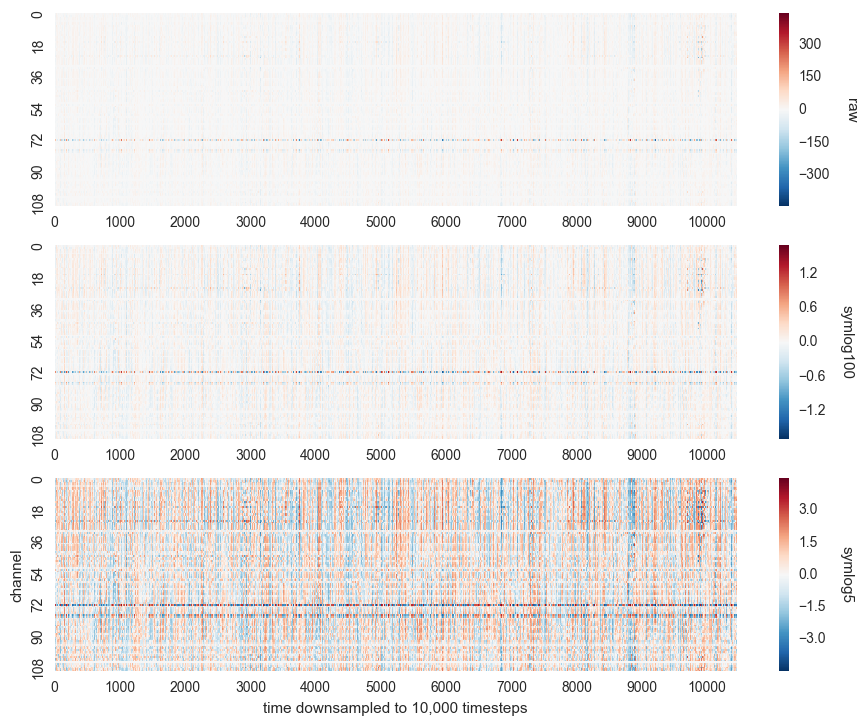

In [3]:
from panda.methods.misc import setup
from panda.methods.denoise import highpass
from panda.methods.denoise import bandstop
from panda.methods.denoise import wave_rejection
from panda.methods.denoise import eog_regress
(D, p_local) = setup(D, {}, p_global)
(D, p_local) = highpass(D, p_local, p_global)
#(D, p_local) = bandstop(D, p_local, p_global)
(D, p_local) = eog_regress(D, p_local, p_global)
(D, p_local) = wave_rejection(D, p_local, p_global)
viz.heatmap(D, p_local, p_global)

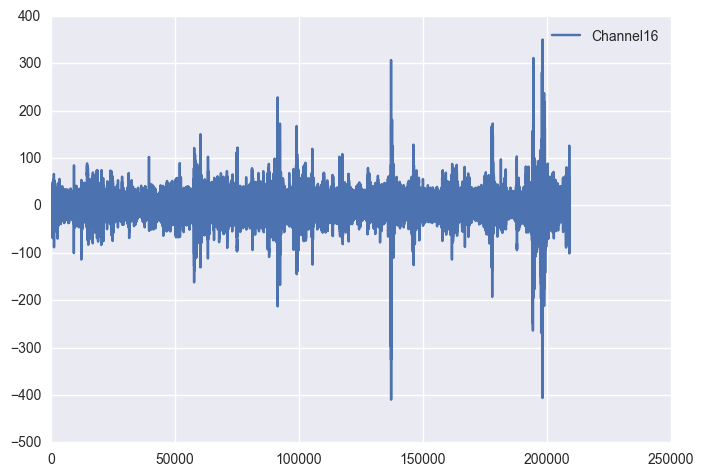

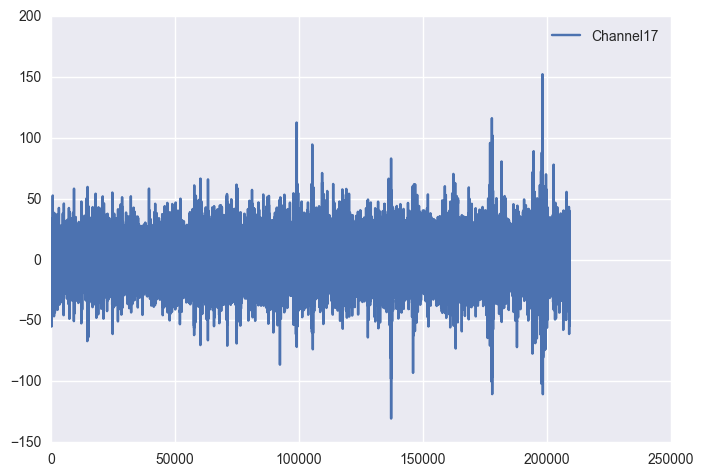

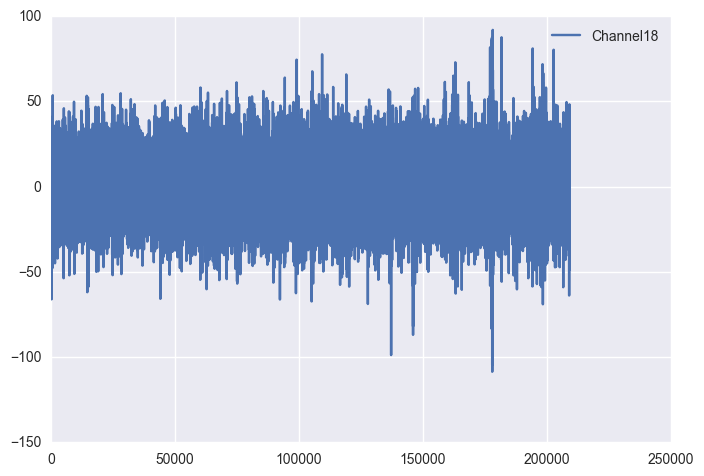

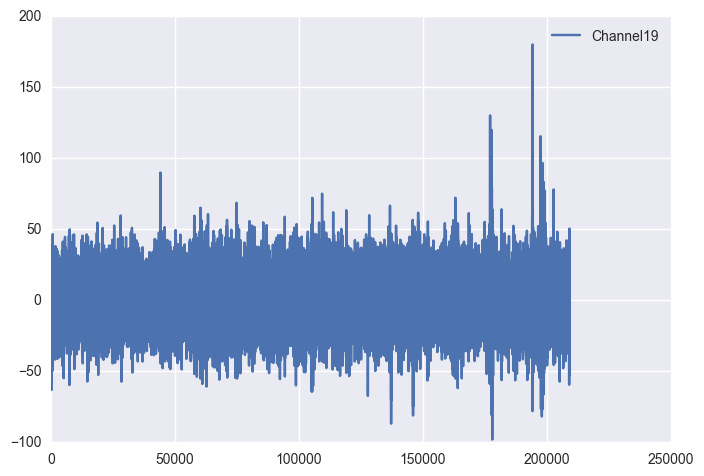

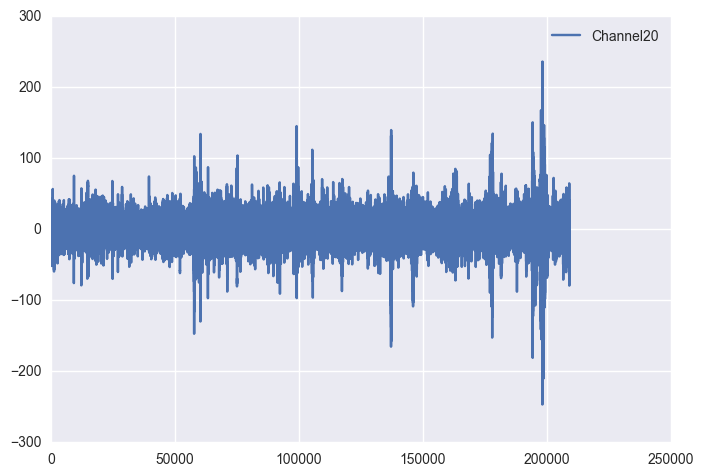

In [4]:
sparkchans = [16, 17, 18, 19, 20]
for i in sparkchans:
    plt.plot(D[i, :], label = 'Channel' + str(i))
    plt.legend()
    plt.show()

As we can see we still have sparsely supported gross outliers in our data matrix. To remove these, we simply take the mean and standard deviation of the magnitudes of all the values in our matrix. When any values fall outside of ? $\sigma$ of the mean, we will set that value to be either $\mu + ? \sigma$ or $\mu - ?\sigma$ depending on whether this value was too high or too low.

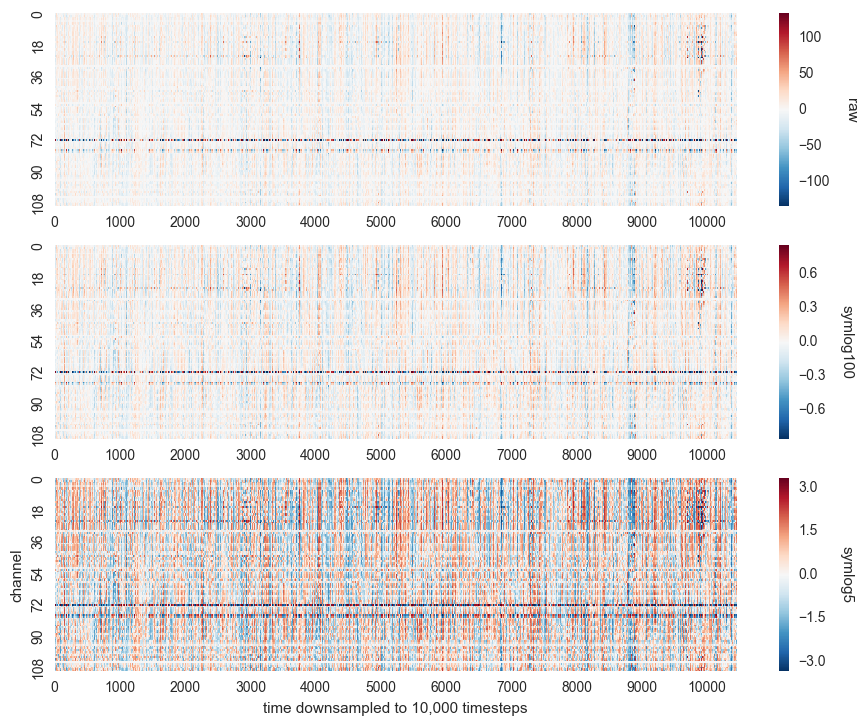

In [5]:
from panda.methods.denoise import amp_shrinkage
(D_as, p_local) = amp_shrinkage(D, p_local, p_global)
viz.heatmap(D_as, p_local, p_global)

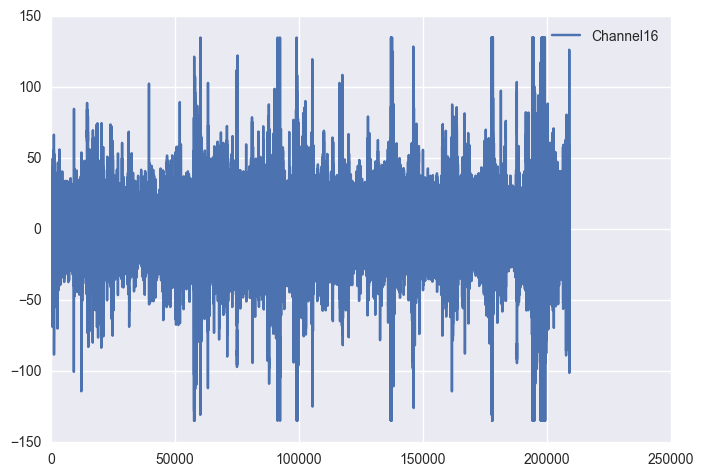

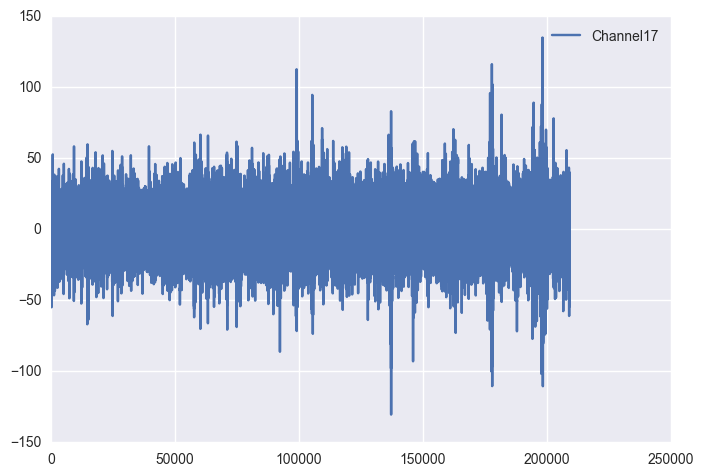

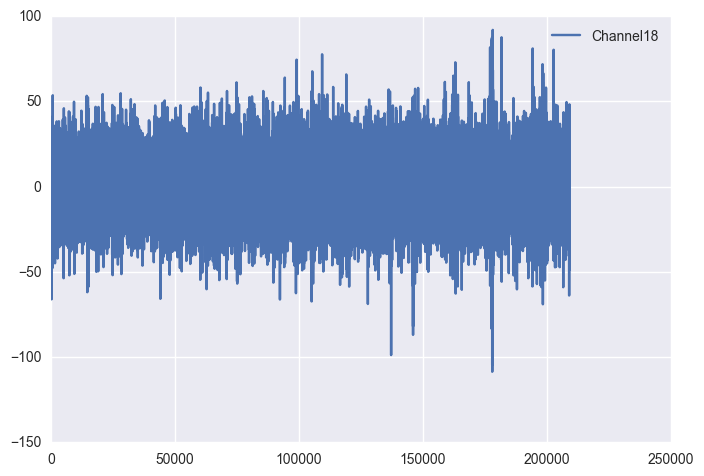

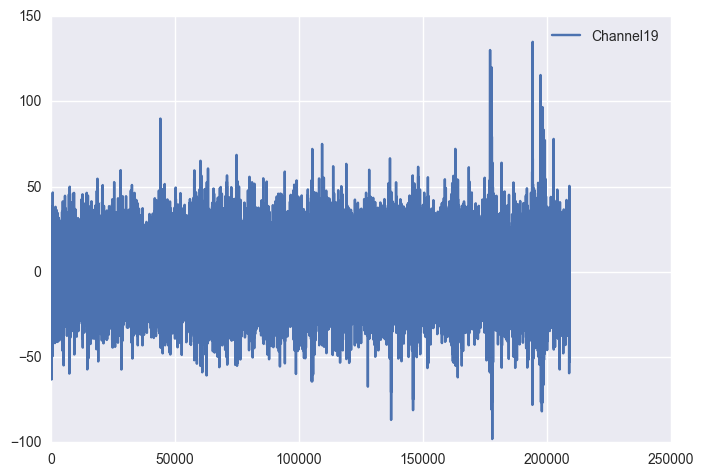

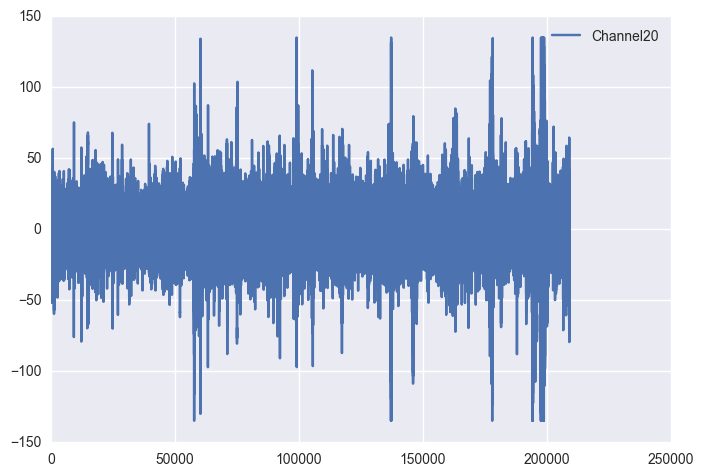

In [6]:
for i in sparkchans:
    plt.plot(D_as[i, :], label = 'Channel' + str(i))
    plt.legend()
    plt.show()

The short segments of high signal variance are gone here.

We show the residual below.

E.g., `D_as - D_wr`.

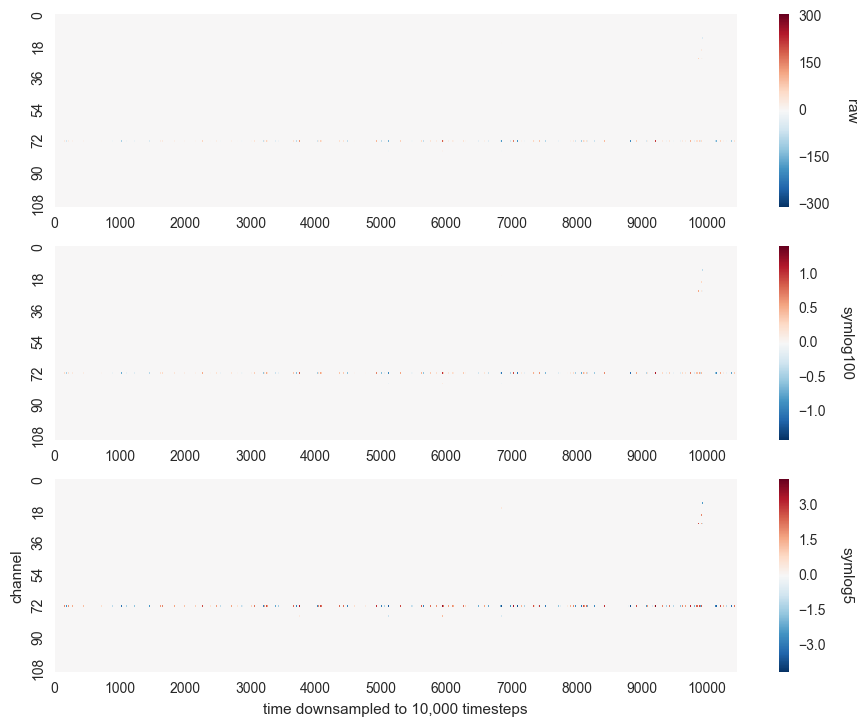

In [7]:
viz.heatmap((D_as - D), p_local, p_global)

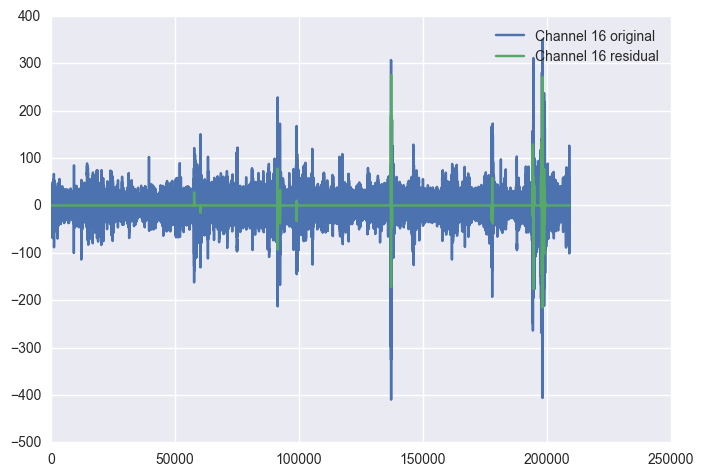

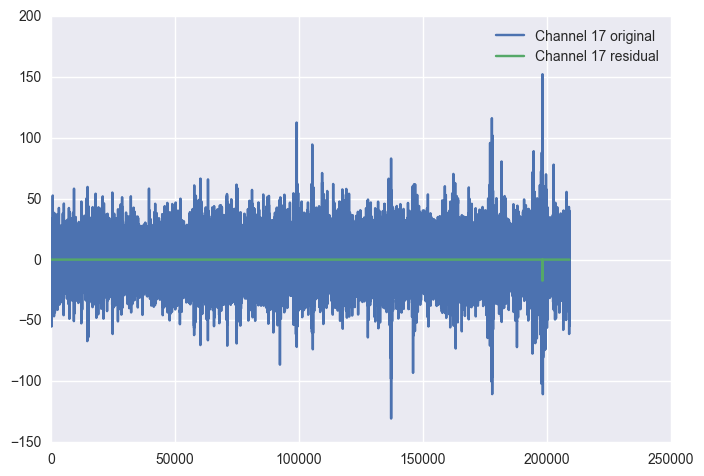

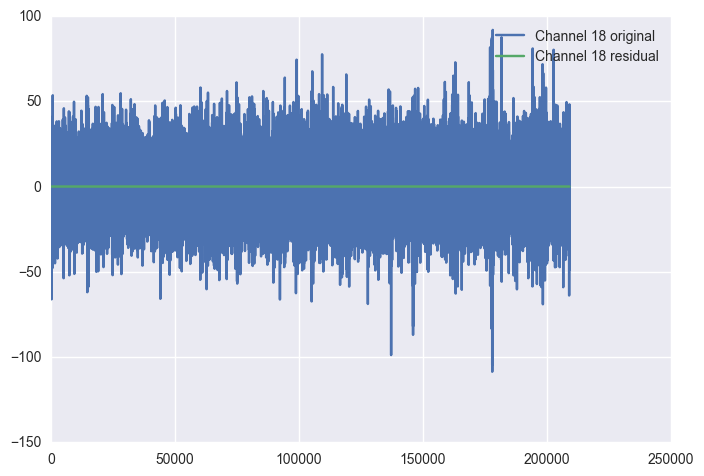

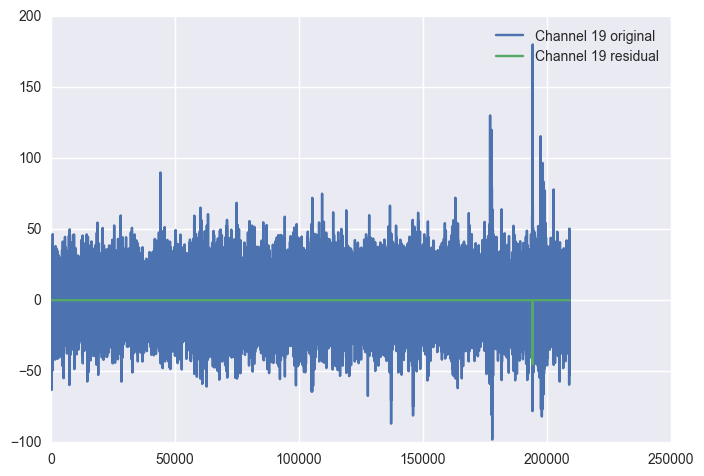

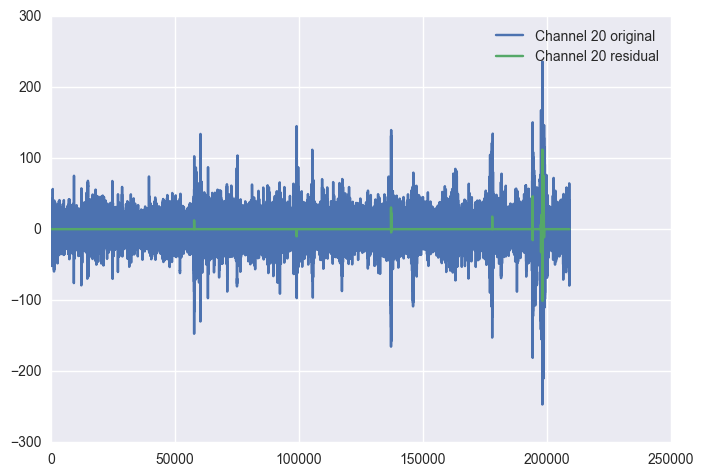

In [8]:
for i in sparkchans:
    plt.plot(D[i, :], label = 'Channel ' + str(i) + ' original')
    plt.plot(D_as[i, :] - D[i, :], label = 'Channel ' + str(i) + ' residual')
    plt.legend()
    plt.show()

#### Results...
Here are the discriminibility results after running this function on an entire dataset (after the preceding functions in the pipeline)...
![image](../results/bids_raw/disc-heat-_amp_shrinkage.png)